**The Relationship Between Age and Total Hours Spent Playing Minecraft**

**Introduction:**

Studies have shown that players in the younger demographic are more likely to contribute to gameplay data based on game interaction.  Specifically, players aged 15-21 account for 53% of the user base for Minecraft (Woodward, 2025). Suggesting that these individuals that are younger are more likely to develop gaming addictions and go for prolonged engagement. In this project, we analyze the variable age, and examine how age relates to total hours played. By identifying demographic groups that tend to play more, researchers can better focus their recruitment and resource planning strategies.

**Question: Can we predict playing hours based on age?**

Dataset Description: Minecraft gameplay data collected by a research group at UBC led by Frank Wood from a MineCraft server, and players' actions are recorded as they navigate through the world.
- Number of observations: 196 players 
- Number of variables: 7
  
Variables in the format: Variable, Type, Description
1. hashedEmail, Categorical, Identifier for each player
2. Experience, Categorical, Player self-reported experience level or score
3. Subscribe, Binary (TRUE/FALSE), Whether player subscribed to the game newsletter
4. Played_hours, Numeric, Total hours played 
5. Name, Categorical, Name of player
6. Gender, Categorical, Players gender (self-reported) 
7. Age, Numeric, Player age in years

Data considerations and issues:
1. Missing or inconsistent data. Some players may have incomplete or missing demographic info.
2. Outliers are possible but hard to determine since majority of values are possible. Some values are as high as 200+ and many values are less than 5. 

Note: Summary statistics provided below.

In [67]:
summary(players_clean)

  experience        subscribe       hashedEmail         played_hours   
 Length:109         Mode :logical   Length:109         Min.   :  0.10  
 Class :character   FALSE:25        Class :character   1st Qu.:  0.10  
 Mode  :character   TRUE :84        Mode  :character   Median :  0.50  
                                                       Mean   : 10.51  
                                                       3rd Qu.:  1.80  
                                                       Max.   :223.10  
     name              gender               Age       
 Length:109         Length:109         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.57  
                                       3rd Qu.:23.00  
                                       Max.   :49.00  

**Methods and Results**

To begin the analysis, I loaded the players.csv dataset containing player characteristics. I focused on variables relevant to the research question: Age (explanatory variable) and played_hours (response variable). I filtered the dataset to remove any missing values that included zero or “NA”. 

To test the hypothesis that younger players tend to play more, I used a simple linear regression model to predict played_hours based on Age. This model was selected because:

1. Both variables are numeric.
2. The goal is to measure and quantify a potential linear relationship.
3. Linear regression provides interpretable coefficients (slope) and diagnostics (R², residuals).

A simple linear regression is important because:
1. We're testing a linear hypothesis (younger age => more hours played).
2. We can quanitify direction and strength.

Assumptions Considered: Linearity, Independence, Homoscedasticity, Normality of residuals.

Potential Limitations:
1. The relationship may not be linear in reality.
2. Outliers (extreme playtime values) can distort results.
4. Linear regression is limited to numeric outcomes and can underfit complex patterns.

Model Selection and Evaluation: 
I noticed that in played_hours, the values ranged from 0.1 to 223. These are very extreme values, so to account for that, I created two scatterplots to visualize the relationship between Age and total hours played:

Figure 1: A regular-scale scatter plot of Age vs. Played Hours.

Figure 2: A log-scale scatter plot of Age vs. Played Hours, applied to better visualize the distribution due to right-skewed playtime values.

General Process:

After loading & cleaning data:
1. Define the model and recipe using log_hours ~ Age.
2. Use 5-fold cross-validation to assess performance.
3. Split the data into a 70/30 train-test split.
4. Fit the model on the training set and evaluates on the test set.
5. Generate predictions and visualize the regression line.
6. Extract and displays the model coefficients.


In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
players_clean <- players |>
  filter(!is.na(played_hours), played_hours > 0) |>
  filter(!is.na(Age)) 
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


In [4]:
players_final <- players_clean |>
select(played_hours, Age)
players_final

set.seed(10)
cv_folds <- vfold_cv(players_final, v = 5, strata = Age)

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(played_hours ~ Age, data = players_final)

lm_workflow <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec)

cv_results <- lm_workflow |>
  fit_resamples(
    resamples = cv_folds,
    metrics = metric_set(rmse, rsq, mae),
    control = control_resamples(save_pred = TRUE)
  )

collect_metrics(cv_results)

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.7,21
0.1,21
0.1,17
1.6,23
1.5,25
0.2,22
48.4,17


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,17.30896121,5,3.139938122,Preprocessor1_Model1
rmse,standard,30.69102580,5,10.861976066,Preprocessor1_Model1
rsq,standard,0.01798412,5,0.007387258,Preprocessor1_Model1


In [5]:
set.seed(10)
players_split <- initial_split(players_final, prop = 0.70, strata = Age) 
players_train <- training(players_split) 
players_test <- testing(players_split)

In [6]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(played_hours ~ Age, data = players_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = players_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
    20.0465      -0.4416  


In [7]:
lm_test_preds <- predict(lm_fit, new_data = players_test) |>
  bind_cols(players_test)

lm_test_results <- lm_test_preds |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,37.463858775
rsq,standard,0.004571549
mae,standard,16.253929979


In [8]:
Age_prediction_grid <- expand.grid(
  Age = seq(min(players_clean$Age, na.rm = TRUE),
            max(players_clean$Age, na.rm = TRUE),
            length.out = 100))

Age_preds <- predict(lm_fit, new_data = Age_prediction_grid) |>
  bind_cols(Age_prediction_grid)

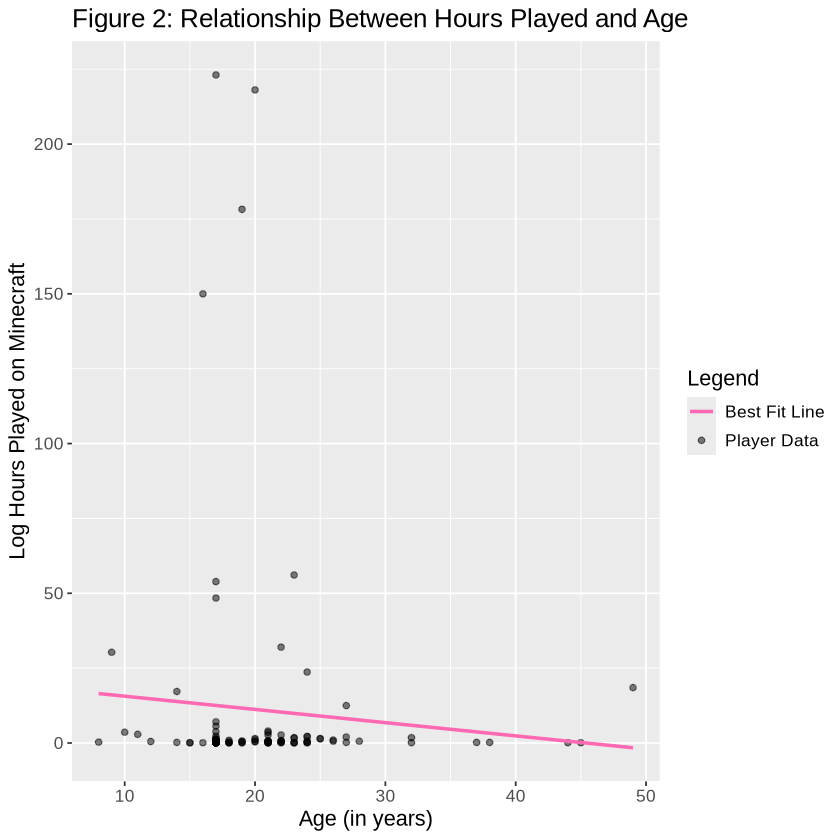

In [22]:
lm_plot_final <- ggplot(players_final, aes(x = Age, y = played_hours)) +
  geom_point(aes(color = "Player Data"), alpha = 0.5) +
  geom_line(data = Age_preds,
            aes(x = Age, y = .pred, color = "Best Fit Line"),
            linewidth = 1) +
  xlab("Age (in years)") +
  ylab("Log Hours Played on Minecraft") +
  ggtitle("Figure 2: Relationship Between Hours Played and Age") +
  scale_color_manual(
    name = "Legend",
    values = c("Player Data" = "black", "Best Fit Line" = "hotpink")
  ) +
  theme(text = element_text(size = 13))

lm_plot_final

In [10]:
coeffs <- lm_fit |>
             extract_fit_parsnip() |>
             tidy()
coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),20.046544,14.503486,1.3821879,0.1711287
Age,-0.441617,0.679327,-0.6500801,0.5176811


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,0.87908671,5,0.09240940,Preprocessor1_Model1
rmse,standard,1.20739410,5,0.20847754,Preprocessor1_Model1
rsq,standard,0.02858579,5,0.02440942,Preprocessor1_Model1


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
  9.252e-01    3.798e-05  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.12524312
rsq,standard,0.02719432
mae,standard,0.71832880


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.9251565948,0.51255643,1.804984868,0.07520084
Age,0.0000379837,0.02400757,0.001582155,0.99874194


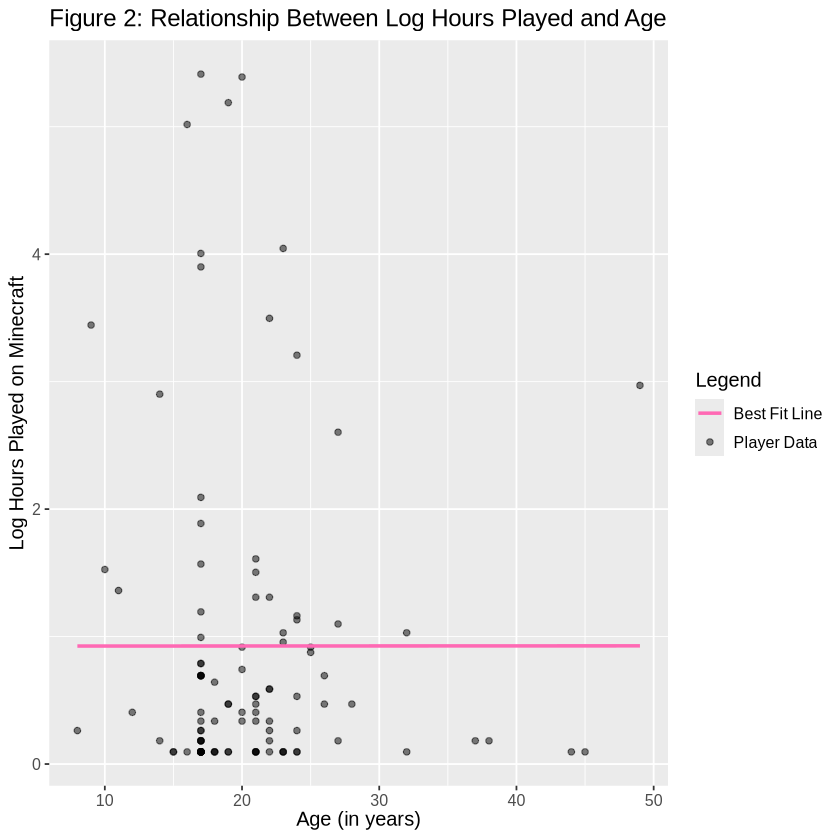

In [24]:
# Repeat all steps above but this time, we converted the played_hours to log hours
players_clean2.0 <- players |>
  filter(!is.na(played_hours), played_hours > 0) |>
  filter(!is.na(Age)) |>
mutate(log_hours = log1p(played_hours))

players_final2.0 <- players_clean2.0 |>
select(log_hours, Age)

set.seed(10)
cv_folds2.0 <- vfold_cv(players_final2.0, v = 5, strata = Age)

lm_spec2.0 <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe2.0 <- recipe(log_hours ~ Age, data = players_final2.0)

lm_workflow2.0 <- workflow() |>
  add_recipe(lm_recipe2.0) |>
  add_model(lm_spec2.0)

cv_results2.0 <- lm_workflow2.0 |>
  fit_resamples(
    resamples = cv_folds2.0,
    metrics = metric_set(rmse, rsq, mae),
    control = control_resamples(save_pred = TRUE)
  )

collect_metrics(cv_results2.0)

set.seed(10)
players_split2.0 <- initial_split(players_final2.0, prop = 0.70, strata = Age) 
players_train2.0 <- training(players_split2.0) 
players_test2.0 <- testing(players_split2.0)

lm_spec2.0 <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe2.0 <- recipe(log_hours ~ Age, data = players_train2.0)

lm_fit2.0 <- workflow() |>
  add_recipe(lm_recipe2.0) |>
  add_model(lm_spec2.0) |>
  fit(data = players_train2.0)

lm_fit2.0

lm_test_preds2.0 <- predict(lm_fit2.0, new_data = players_test2.0) |>
  bind_cols(players_test2.0)

lm_test_results2.0 <- lm_test_preds2.0 |>
  metrics(truth = log_hours, estimate = .pred)

lm_test_results2.0

Age_prediction_grid2.0 <- expand.grid(
  Age = seq(min(players_clean2.0$Age, na.rm = TRUE),
            max(players_clean2.0$Age, na.rm = TRUE),
            length.out = 100))

Age_preds2.0 <- predict(lm_fit2.0, new_data = Age_prediction_grid2.0) |>
  bind_cols(Age_prediction_grid2.0)

lm_plot_final2.0 <- ggplot(players_final2.0, aes(x = Age, y = log_hours)) +
  geom_point(aes(color = "Player Data"), alpha = 0.5) +
  geom_line(data = Age_preds2.0,
            aes(x = Age, y = .pred, color = "Best Fit Line"),
            linewidth = 1) +
  xlab("Age (in years)") +
  ylab("Log Hours Played on Minecraft") +
  ggtitle("Figure 2: Relationship Between Log Hours Played and Age") +
  scale_color_manual(
    name = "Legend",
    values = c("Player Data" = "black", "Best Fit Line" = "hotpink")
  ) +
  theme(text = element_text(size = 12))

lm_plot_final2.0

coeffs2.0 <- lm_fit2.0 |>
             extract_fit_parsnip() |>
             tidy()
coeffs2.0

**Discussion:**

Insights:

From Figure 1, there appears to be a slight weak negative trend in the relationship between Age and played hours — younger players tend to play slightly more. However, this trend is not strong with many scattered points. In the log-transformed plot, the best-fit line was nearly horizontal, suggesting that after accounting for skewed data, there is essentially no meaningful relationship between Age and hours played. Most players played only a small number of hours, regardless of age.

In both the regular and log-transformed linear regression models, Age was not a statistically significant predictor of playtime:

Regular scale model:

Slope estimate = -0.44,

p-value = 0.518

This suggests a weak negative trend (older players may play slightly less), but the high p-value shows that this relationship is not statistically significant.

Log-transformed model:
Slope estimate = 0.000038,

p-value = 0.999
Here, the slope is effectively zero, and the p-value shows no evidence of a relationship at all.

I’m not surprised by the results. Due to the wide variability in gaming behavior and the presence of extreme values (outliers), I did not expect a strong or significant relationship. The results confirmed that Age alone does not meaningfully explain how much a player engages with the game.

What impact could such findings have?
These results indicate that recruitment and resource planning cannot depend on Age alone to estimate demand or engagement. If we want to predict which players will contribute a lot of playtime, we need to look at other features, such as number of sessions, login times, or player activity patterns.

Future questions:

1. Would a multiple linear regression using more predictors (like gender, number of sessions, or player type) be more informative?
2. Does combining demographic and behavioral variables help predict newsletter subscriptions or high-engagement players?



**References:**

Woodward, M. (2025, April 1). Minecraft user statistics: How many people play Minecraft in 2025? SearchLogistics. https://www.searchlogistics.com/learn/statistics/minecraft-user-statistics/ 